# İbrahim AYDIN-Y220237017 Yazılım Müh. YL (Tezli) 2.Dönem "Pyhton Programlama" Dersi Final Ödevi

##  KNN (K- En Yakın Komşu) Algoritması İle YapayZeka/Makine Öğrenmesi İncelemesi


### Machine Learning modellerinden "KNN Modelini" Python'da "şeker hastalığı veri seti" örneğiyle inceliyorum.

## KÜTÜPHANELERİ YÜKLEDİKTEN SONRA VERİ SETİMİ HAZIR HALE GETİRİYORUM

In [1]:
#Kütüphaneleri import ediyorum.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# DataSeti tüklüyor ve yazdırıyorum.

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.info()  #Hem Kayıt sayısını, hem veri tiplerini hem de veri girilmemiş alanları göreyim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#768 tane kaydın olduğunu ve null verisi olmadığını görüyorum. Fakat kayıtlarda insülin değerlerinden 0 oalnlar var. 
# Bu yanlış girilmiştir. Bu değerleri değiştirmek gerekiyor.
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.eq(0).sum() # Hangi değişkende kaç tane 0 değeri var?

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
# Glukoz, insülin, kan basınıcı gibi değerlerin 0 olamayacağını belirliyorum. 
# Ve İşleme katılmaması gereken 0 değerlerini NaN ile değiştriyorum. Yeni Seti eşitliyorum.

data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [6]:
# Şimdi de NaN ile ifade ettiğim eksik değerlerin yerine her bir özelliğin ortalaması ile dolduruyorum.
data.fillna(data.mean(),inplace=True)


In [7]:
data.head() #DataSeti tekrar yazdırdığımızda 0 değerlerinin yerine ortalama değerlerin geldiğini görüyorum.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [8]:
#Son kontrollerimi yapıyorum.Null ve 0 değerleri sayısına bakıyroum
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
# Görülen şu ki mesela ilk kayıt olan hamilelik sayısı ile şeker hastalığının arasındaki ilişki 0.22 (%22) imiş.
# Glukoz miktarıyla ise şeker hastalığı arasındaki ilişki ise 0.49 (%49) imiş.

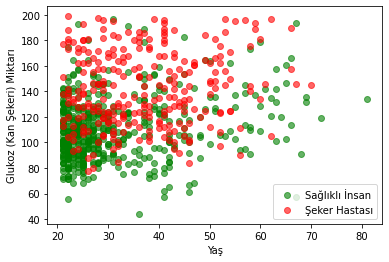

In [11]:
# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı

seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]


# Şimdilik sadece glukoza'a bakarak örnek bir çizimini yapıyorum:
# Programımızın sonunda makine öğrenme modelim sadece glukoza değil tüm diğer verilere bakarak bir tahmin yapacaktır.

plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="Sağlıklı İnsan", alpha = 0.6)  #0.6 değeri değiştirilebilir
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="Şeker Hastası", alpha = 0.6)         #0.6 değeri değiştirilebilir
plt.xlabel("Yaş")
plt.ylabel("Glukoz (Kan Şekeri) Miktarı")
plt.legend()
plt.show()

In [12]:
#Korelasyon Analizi yaparak hangi değişkenler birbiriye ne kadar ilişkili olduğuna bakıyırum.
#İki özellik arasında korelasyonun düşük olmasını, çıktıyı etki derecesinin (korelasyonun) yüksek olmasını bekliyorum.
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [13]:
# Korelasyon ısı haritasında görelim. Yüksek değerler daha yüksek ısıda görülecek.

import seaborn as sns # Grafik kütüphanesi. 


<AxesSubplot:>

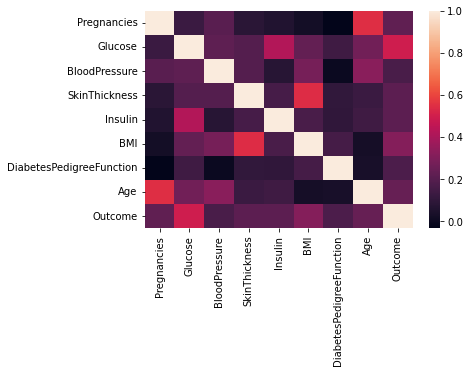

In [14]:
sns.heatmap(data.corr())

In [15]:
# Siyah değerler 0 değeridir.Açık renkler istenmez. Şu grafikte özellikler arasında yüksek korelasyon etkileşme yok. 
# Koyu renkler baskın. İyi bir grafik.

## VERİ SETİMİ HAZIR HALE GETİRDİM. KNN MODELİMİ HAZIRLIYORUM

### ÖĞRETİMDE KULLANACAĞIM VERİ SETİNİ AYARLIYORUM. SONRASINDA NORMALİZASYONA GİDİYORUM.

In [16]:
# x ve y eksenlerini belirliyorum
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1)    # Bağımlı Değişken (dependent variable) olan Outcome sütununu çıkarıyorum, 

#Çüknü KNN algoritması x değerleri ile eğitim yapacak..
    
# normalization yapıyorum - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyorum
# Eğer bu şekilde normalization yapmazsam yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())
    



Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


### VERİ SETİMİ %80 ÖĞRENME İÇİN, %20 TEST İÇİN AYIRIYORUM

In [17]:
# train (Öğretici) datamız ile test datamızı ayırıyorum
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)  

# x normalize edilmiş değerler, y ise outcome yani 0-1
# test_size ve random_state değeri ile oynayarak doğrullama test sonucunu değiştirebilirim.
# Burada Datasetin %20sini (test_size=0.2) test için kullanacağım. (Yaklaşık 150 kişi) (Toplam 768 kayıt var)
# %80 kısmını ise eğitmede kullanacağım.(Yaklaşık 600 kişi)... Töreler böyle :)
# Bu seçimleri ise random şekilinde yapacağım.


# knn modelimi oluşturuyorum.
knn = KNeighborsClassifier(n_neighbors = 3)     # n_neighbors = k=3 (En yakın komşuluk sayısını 3 vermiş oluyorum) (Bu k sayısı ile oynayacağım)
knn.fit(x_train,y_train)                        # Modelimi fit ediyorum yani eğitiyorum. X noramlize değerleri ve outcome(Çıktı) değerleriyle...
prediction = knn.predict(x_test)                # %20 lik kısmı test için veriyorum.

# K=3 için  Modelimin doğruluk oranını yazdırıyorum.
print("K=3 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100)  



K=3 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 79.87012987012987


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)
# En yüksek doğruluk için k değeri kaç olmalı ?
# en iyi k değerini bulalım..
# for döngüsüyle k değerini 1 den 10 değerine kadar deneyeceğim. Sonuçları yazdıracağım. 
# Daha çok ve büyük k değeri seçimi  modelimi yavaşlatabilir ve doğru sonuç vermeyebilir.

sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print("K= ",sayac, "için Doğruluk Oranı= %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1
    
 
     

K=  1 için Doğruluk Oranı= % 70.12987012987013
K=  2 için Doğruluk Oranı= % 74.67532467532467
K=  3 için Doğruluk Oranı= % 79.87012987012987
K=  4 için Doğruluk Oranı= % 75.97402597402598
K=  5 için Doğruluk Oranı= % 81.81818181818183
K=  6 için Doğruluk Oranı= % 79.87012987012987
K=  7 için Doğruluk Oranı= % 79.87012987012987
K=  8 için Doğruluk Oranı= % 79.22077922077922
K=  9 için Doğruluk Oranı= % 81.16883116883116
K=  10 için Doğruluk Oranı= % 79.87012987012987


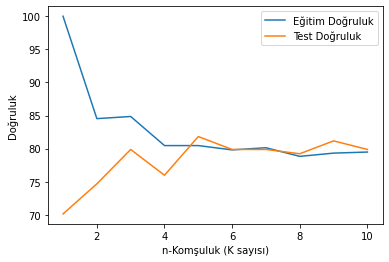

In [19]:
egitim_dogruluk=[]
test_dogruluk=[]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)
for komsu in range(1,11):   
    knn_yeni2 = KNeighborsClassifier(n_neighbors = komsu)
    knn_yeni2.fit(x_train,y_train)
    egitim_dogruluk.append(knn_yeni2.score(x_train,y_train)*100)
    test_dogruluk.append(knn_yeni2.score(x_test,y_test)*100)                    

sayi= range(1,11)  
plt.plot(sayi,egitim_dogruluk,label="Eğitim Doğruluk")
plt.plot(sayi,test_dogruluk,label='Test Doğruluk')
plt.ylabel('Doğruluk')
plt.xlabel('n-Komşuluk (K sayısı)')
plt.legend()

### Grafikte En yüksek tahminli test sonucu değerinin K=5 değerinde olduğu görünüyor.(%81.81).   TEST DOĞRULUK DEĞERİ YÜKSEK OLAN 5 DEĞERİ K DEĞERİ OLARAK (KOMŞULUK SAYISI) MODELDE TERCİH EDİLDİ...

### Modelimi K=5 ile %81.81 doğruluk oranında %80 veri ile eğitiyorum

In [20]:
# En iyi K değeri olan 5 değerini modelime uyguluyorum. %81.81 doğruluk oranını tekrar test ediyorum. 
# %80 eğitim, %20 test, K=5

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)  
knn = KNeighborsClassifier(n_neighbors =5)    
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=7 için  Modelimin doğruluk oranını yazdırıyorum.
print("K=5 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100) 

K=5 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 81.81818181818183


### Modelimin doğruluk oranını değişik K değerleri ve %Test Verisi değerleri ile kıyaslıyorum

In [21]:
# Eğer eğitici data sayımı %80 den %90 a yükseltirsem o zaman %10 test için kalacak.
# %90 eğitim, %10 test, K=5

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)  #test_size=0.1 (%10 test için ayır)
knn = KNeighborsClassifier(n_neighbors =5)  # K=5 
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=7 için  Modelimin doğruluk oranını yazdırıyorum. En iyi sonucun %80 de olduğunu görüp töreleri kabul ediyorum :)
print("K=5 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100) 



K=5 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 77.92207792207793


In [22]:
# Eğer eğitici data sayımı %80 den %70 e indirirsem o zaman %30 test için kalacak.
# %70 eğitim, %30 test, K=7

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)  #test_size=0.1 (%30 test için ayır)
knn = KNeighborsClassifier(n_neighbors =5)  # K=5  
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=5 için  Modelimin doğruluk oranını yazdırıyorum. Daha az öğrettiğim için daha da düşük doğruluk oranı beliyorum.
print("K=7 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100) 


K=7 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 77.92207792207793


In [23]:
# Eğer eğitici data sayımı %80 den %50 e indirirsem o zaman %50 test için kalacak.
# %50 eğitim, %50 test, K=7

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state=1)  #test_size=0.1 (%30 test için ayır)
knn = KNeighborsClassifier(n_neighbors =7)  # K=7  
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=7 için  Modelimin doğruluk oranını yazdırıyorum. Daha az öğrettiğim için daha da düşük doğruluk oranı beliyorum.
print("K=7 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100) 


K=7 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 77.34375


### Modelime Kesin Kararımı Verdim

In [24]:
# Artık Modelimi oluşturdum ve değerleri buldum. Modele karar verdim.
# %80 eğitim, %20 test, K=5 (%81.81 Doğruluk oranı) 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)  
knn = KNeighborsClassifier(n_neighbors =5)    
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=5 için  Modelimin doğruluk oranını yazdırıyorum.
print("K=5, % 80 Veri Öğretimi ile TERCİH ETTİĞİM MODELİMİN DOĞRULUK ORANI = %", knn.score(x_test, y_test)*100) 

K=5, % 80 Veri Öğretimi ile TERCİH ETTİĞİM MODELİMİN DOĞRULUK ORANI = % 81.81818181818183


### Şimdi Hasta Tahmini İsteyeceğim

In [25]:
#DataSet verilerimi tekrar yazdırıyorum
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [26]:
# Yeni bir hasta tahmini için kütüphaneyi çağırıyorum.
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyorum - daha hızlı normalization yapabilmek için MinMax  scaler kullandım...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

# Değerleri sırasıyla veriyorum. 
# İlk kaydın (şeker hastasıolarak verilen) verilerini girip test ediyorum. %81.81 ihtimalle "şeker hastası" çıkmalı sonuç.

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,155,33.6,0.627,50]]))) 

#Sonuç 0 gelirse sağlıklı insan , 1 Gelirse Şeker Hastası insan tahminini anlıyorum. 

if(new_prediction[0]==1):
    print ("Şeker Hastası")
else:
    print ("Sağlıklı İnsan")

Şeker Hastası


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [27]:
# Yeni bir hasta tahmini için kütüphaneyi çağırıyorum.
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandım...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

#Değerleri sırasıyla veriyorum. 
# İkinci kaydın (sağlıklı) verilerini girip test ediyorum. %81 ihtimalle "Sağlıklı İnsan" çıkmalı sonuç.

new_prediction = knn.predict(sc.transform(np.array([[1,85,66,29,155,26.6,0.351,31]]))) 

#Sonuç 0 gelirse sağlıklı insan , 1 Gelirse Şeker Hastası insan tahminini anlıyorum.

if(new_prediction[0]==1): #Sonuç 0 gelirse sağlıklı insan , 1 Gelirse Şeker Hastası insan tahminini anlıyorum. 
    print ("Şeker Hastası")
else:
    print ("Sağlıklı İnsan")

Sağlıklı İnsan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Sonuç: KNN Algoritması ile oluşturduğum mıdelim %81.81 oran ile doğru tahmin üretmektedir.